# Customer Purchase Insights for Peak Shopping Season
### Scenario: the company just launched a new online shopping website. 
The marketing team asks to review a dataset of online shoppers' purchasing intentions gathered over the last year. 
Specifically, the team wants to generate some insights into customer browsing behaviors in November and December, the busiest months for shoppers. 


### Data description:

You are given an `online_shopping_session_data.csv` that contains several columns about each shopping session. Each shopping session corresponded to a single user. 

|Column|Description|
|--------|-----------|
|`SessionID`|unique session ID|
|`Administrative`|number of pages visited related to the customer account|
|`Administrative_Duration`|total amount of time spent (in seconds) on administrative pages|
|`Informational`|number of pages visited related to the website and the company|
|`Informational_Duration`|total amount of time spent (in seconds) on informational pages|
|`ProductRelated`|number of pages visited related to available products|
|`ProductRelated_Duration`|total amount of time spent (in seconds) on product-related pages|
|`BounceRates`|average bounce rate of pages visited by the customer|
|`ExitRates`|average exit rate of pages visited by the customer|
|`PageValues`|average page value of pages visited by the customer|
|`SpecialDay`|closeness of the site visiting time to a specific special day|
|`Weekend`|indicator whether the session is on a weekend|
|`Month`|month of the session date|
|`CustomerType`|customer type|
|`Purchase`|class label whether the customer make a purchase|

## Step 1: Understand the Problem
The marketing team wants to analyze the behavior of online customers during November and December (the busiest months).
This report explores the purchase rates for different customer types, identifies the strongest correlation in time spent among page types, and evaluates the likelihood of achieving at least 100 sales out of 500 online shopping sessions with an improved purchase rate for returning customers.

### Task decomposion ### 
- Explore the data
- Subset data from November and December
- Calculate online purchase rates for both returning and new customers
- Examine the correlation between different duration variables to identify the strongest relationship
- Examine the new marketing campaign that shoukd increase purchase rate for returning customers by 15%
- Examine probabity of sales using new purchase rate


## Step 2: Load and Explore the Data

In [1]:
# Import required libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

# Load the data
shopping_data = pd.read_csv("online_shopping_session_data.csv")
shopping_data.head()

,SessionID,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Weekend,Month,CustomerType,Purchase
0,1,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,False,Feb,Returning_Customer,0.0
1,2,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,False,Feb,Returning_Customer,0.0
2,3,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,False,Feb,Returning_Customer,0.0
3,4,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,False,Feb,Returning_Customer,0.0
4,5,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,True,Feb,Returning_Customer,0.0


In [2]:
# Check basic info about the data
shopping_data.info()

# Summary statistics
shopping_data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12055 entries, 0 to 12054
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   SessionID                12055 non-null  int64  
 1   Administrative           12055 non-null  int64  
 2   Administrative_Duration  12055 non-null  float64
 3   Informational            12055 non-null  int64  
 4   Informational_Duration   12055 non-null  float64
 5   ProductRelated           12055 non-null  int64  
 6   ProductRelated_Duration  12055 non-null  float64
 7   BounceRates              12055 non-null  float64
 8   ExitRates                12055 non-null  float64
 9   PageValues               12055 non-null  float64
 10  SpecialDay               12055 non-null  float64
 11  Weekend                  12055 non-null  bool   
 12  Month                    12055 non-null  object 
 13  CustomerType             12054 non-null  object 
 14  Purchase              

,SessionID,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Purchase
count,12055.000000,12055.000000,12055.000000,12055.000000,12055.000000,12055.000000,12055.000000,12055.000000,12055.000000,12055.000000,12055.000000,12054.000000
mean,6028.000000,2.320614,80.735481,0.505268,34.648971,31.688096,1191.743969,0.022125,0.042977,5.793676,0.062829,0.154223
std,3480.123082,3.320123,175.766025,1.270637,141.574000,44.371672,1912.521630,0.048277,0.048468,18.074742,0.200955,0.361177
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3014.500000,0.000000,0.000000,0.000000,0.000000,7.000000,185.000000,0.000000,0.014286,0.000000,0.000000,0.000000
50%,6028.000000,1.000000,8.000000,0.000000,0.000000,18.000000,599.333333,0.003139,0.025068,0.000000,0.000000,0.000000
75%,9041.500000,4.000000,93.500000,0.000000,0.000000,38.000000,1464.104809,0.016947,0.050000,0.000000,0.000000,0.000000
max,12055.000000,27.000000,3398.750000,24.000000,2549.375000,705.000000,63973.522230,0.200000,0.200000,361.763742,1.000000,1.000000


## Step 3: Subset the DataFrame for November and December and Calculate Purchase Rates by Customer Type

In [3]:
print (shopping_data['Month'].unique())

data_nov_dec =  shopping_data[shopping_data['Month'].isin(['Nov', 'Dec'])]


['Feb' 'Mar' 'May' 'Oct' 'June' 'Jul' 'Aug' 'Nov' 'Sep' 'Dec' 'N']


In [4]:
print(shopping_data['CustomerType'].value_counts())
print ()
print ('Only November and December:')
print(data_nov_dec['CustomerType'].value_counts())


Returning_Customer    10386
New_Customer           1668
Name: CustomerType, dtype: int64

Only November and December:
Returning_Customer    3722
New_Customer           728
Name: CustomerType, dtype: int64


In [5]:
# Calculate total number of purchases  by CustomerType

session_counts = data_nov_dec.groupby(['CustomerType', 'Purchase']).size()


total_purchases = (data_nov_dec['Purchase'] == 1).sum()

purchase_new_customer = session_counts[('New_Customer', 1)]
purchase_returning_customer = session_counts[('Returning_Customer', 1)]

print ('Total number of purchases:', total_purchases)
print (purchase_new_customer, purchase_returning_customer)
print (session_counts)

Total number of purchases: 927
199 728
CustomerType        Purchase
New_Customer        0.0          529
                    1.0          199
Returning_Customer  0.0         2994
                    1.0          728
dtype: int64


In [6]:
# Total number of session by CustomerType

total_sessions = data_nov_dec['SessionID'].count()

total_new_customer = np.sum(session_counts['New_Customer'])
total_returning_customer = np.sum(session_counts['Returning_Customer'])

print ('Total number of sessions:', total_sessions)
print(total_new_customer, total_returning_customer)

Total number of sessions: 4450
728 3722


In [8]:
# Calculate online purchase rates by customer type

purchase_rate_new = purchase_new_customer / total_new_customer
purchase_rate_return = purchase_returning_customer / total_returning_customer

# Store the result in a dictionary
purchase_rates = {"Returning_Customer": round (purchase_rate_return,3) , "New_Customer": round (purchase_rate_new,3)}
print(purchase_rates) 

{'Returning_Customer': 0.196, 'New_Customer': 0.273}


To determine purchase behavior, we analyzed the proportion of successful purchases among online shopping sessions for both returning and new customers. 

- For Returning_Customer - 19.559 
- For New_Customer - 27.335

So, new customers had higher purchase rate compared to returning customers during this period.

## Step 4: Identify the strongest correlation among duration variables

In [191]:
# Select relevant duration columns to check correlation
duration_columns = ['Administrative_Duration', 'Informational_Duration', 'ProductRelated_Duration']
duration_data = data_nov_dec[duration_columns]

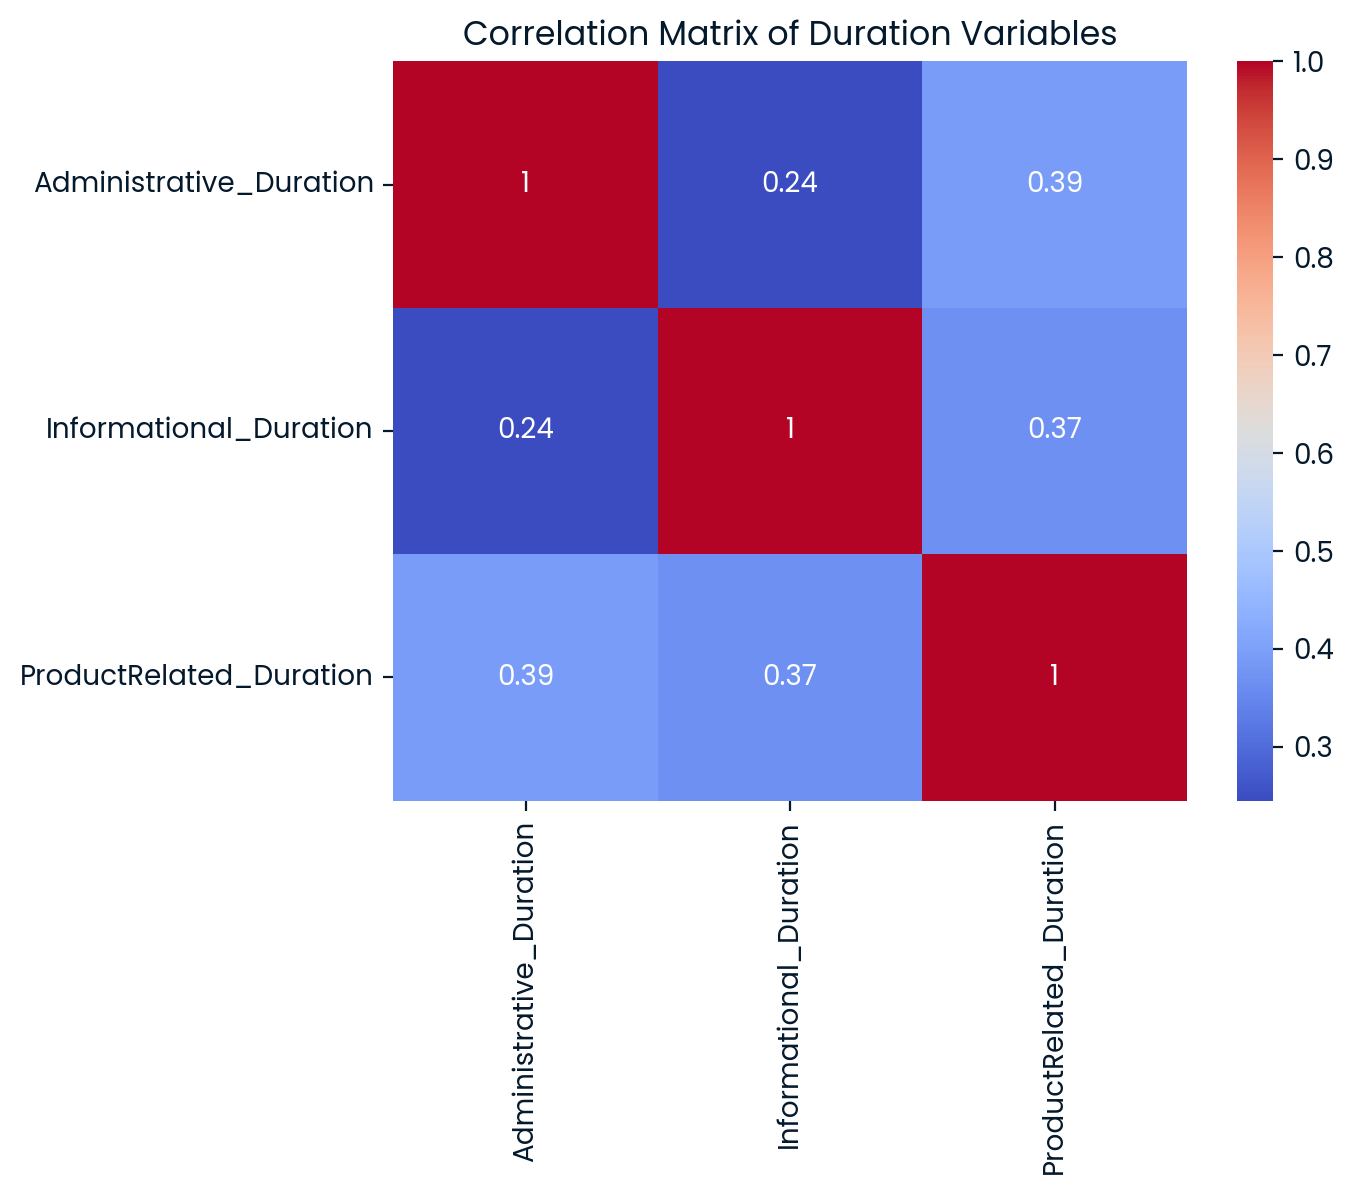

In [192]:
# Compute the correlation matrix
correlation_matrix = duration_data.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title("Correlation Matrix of Duration Variables")
plt.show()

In [193]:
# Find the pair with the strongest correlation
corr_admin_product = duration_data['Administrative_Duration'].corr(duration_data['ProductRelated_Duration']).round(3)
print(f"The strongest correlation is between Administrative_Duration and ProductRelated_Duration: {corr_admin_product}")

# Store the result in a dictionary
top_correlation = {"pair": ("Administrative_Duration", "ProductRelated_Duration"), "correlation": corr_admin_product}

print(top_correlation)

The strongest correlation is between Administrative_Duration and ProductRelated_Duration: 0.39
{'pair': ('Administrative_Duration', 'ProductRelated_Duration'), 'correlation': 0.39}


The highest correlation was found between Administrative_Duration and ProductRelated_Duration. 

This suggests that customers who spend more time on administrative pages also tend to spend more time on product-related pages.

## Step 5: Calculate the Probability of Sales
A new campaign for the returning customers will boost the purchase rate by 15%. What is the likelihood of achieving at least 100 sales out of 500 online shopping sessions for the returning customers? 

In [194]:
# Calculate the improved purchase rate for the returning customers

improved_purch_rate_return = (purch_rate_return * 1.15).round(3)
print (improved_purch_rate_return, '%')

22.493 %


### Since the Purchase variable is binary, we’ll use the Binomial Distribution.
Where: 
- p - probability of success (a "purchase" in our case) or purchase rate
- n - number of trials 
- k - number of success (a "purchase" in our case) needed

In [195]:
# Calculate the Probability of Having at Least 100 Sales

from scipy.stats import binom

n=500
p=improved_purch_rate_return/100
print (n,p)

prob_at_least_100_sales = 1 - binom.cdf(100,n=n, p=p)
print("Probability of having at least 100 sales:", prob_at_least_100_sales.round(3)) 

500 0.22493
Probability of having at least 100 sales: 0.901


The improved purchase rate for returning customers is 22.49% or 0.22493.

This means there is a 90% chance of achieving at least 100 sales under the improved conditions.

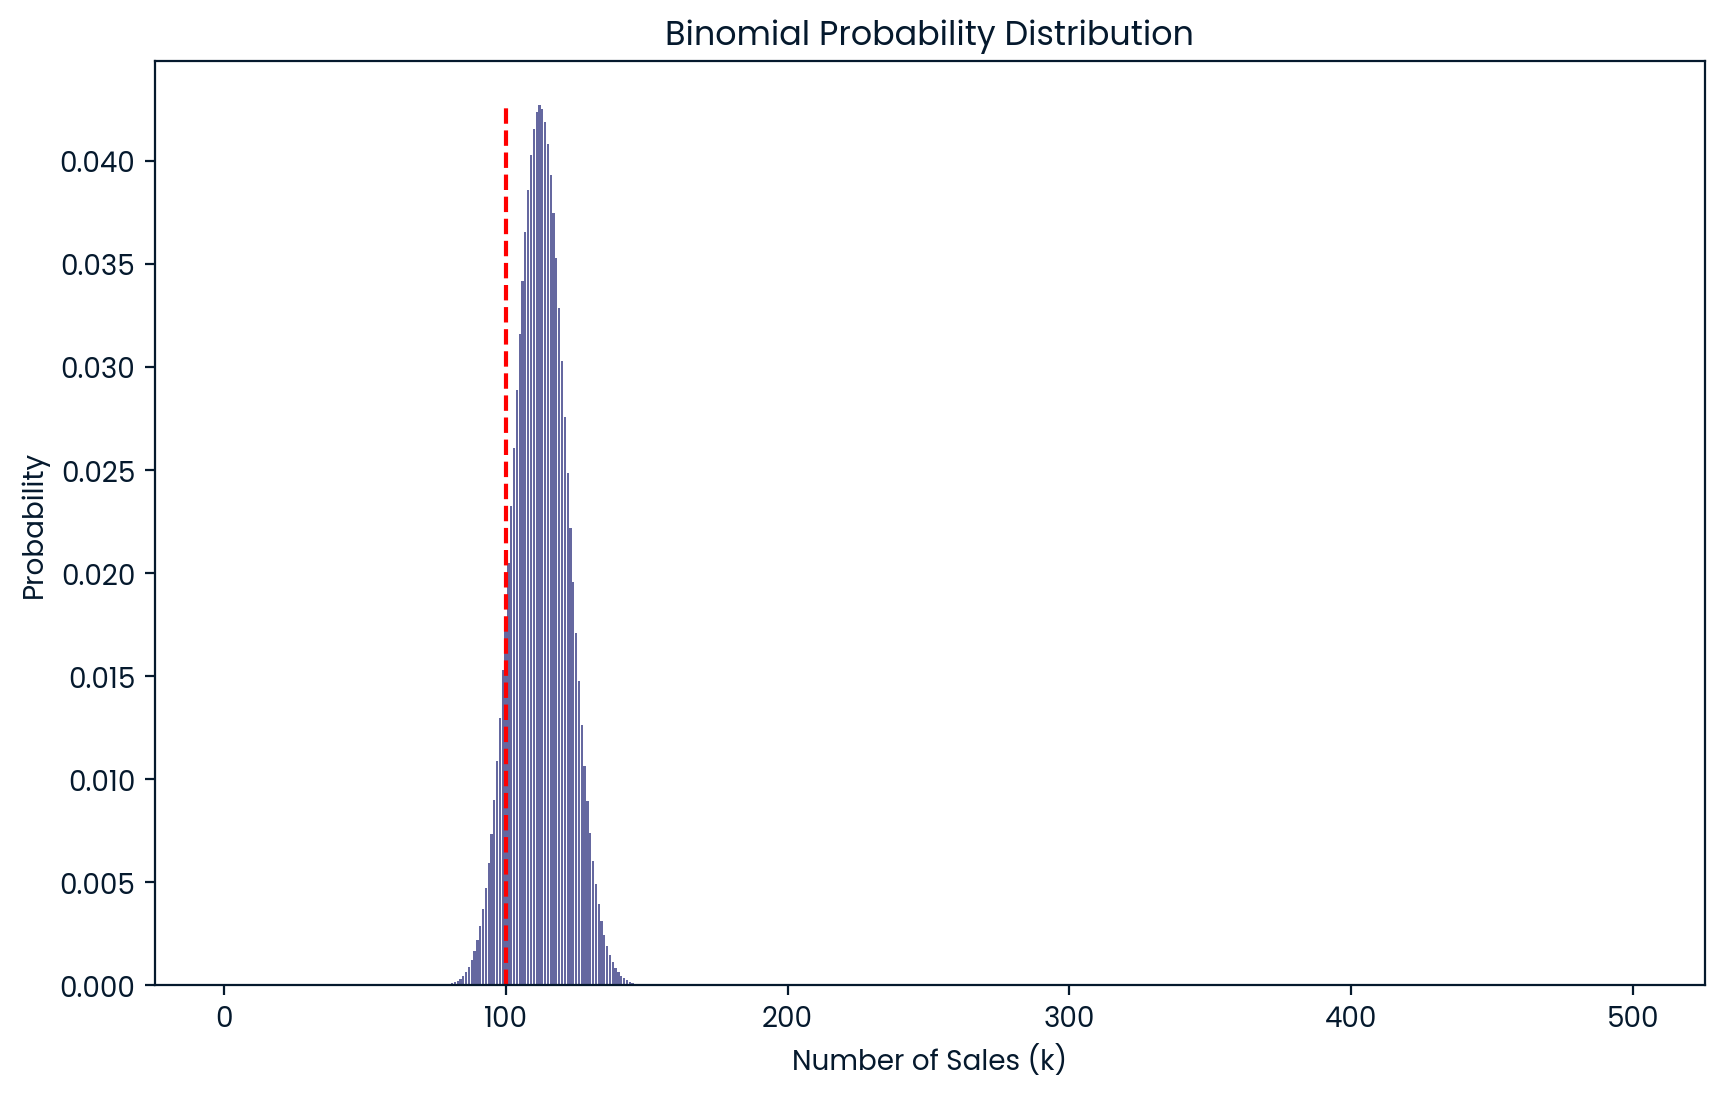

In [203]:
# Plot the Binomial Probability Distribution to better understand the probabilities

n=500
p=improved_purch_rate_return/100
# Generate the range of k values (number of sales)
k_values=np.arange(1, n+1)

# Calculate the probability for each k
probabilities = [binom.pmf(k, n=n, p=p) for k in k_values]

plt.figure(figsize=(10, 6))
plt.bar(k_values, probabilities)

# Probability of exactly 100 sales
plt.vlines(x=100,ymin=0, ymax=max(probabilities), color ='red', linestyle='--')

plt.title('Binomial Probability Distribution')
plt.xlabel('Number of Sales (k)')
plt.ylabel('Probability')
plt.show()

### Conclusions

- New customers exhibited a higher purchase rate (27.34%) compared to returning customers (19.56%).

- The strongest correlation (0.39) was found between time spent on administrative and product-related pages, indicating a potential slight connection in customer browsing behavior.

- With a 15% boost in purchase rate, the probability of achieving at least 100 sales out of 500 sessions is approximately 90%.

By leveraging these insights, the marketing team can make informed decisions to maximize conversions and revenue during peak shopping months.